In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/BeijingPM20100101_20151231.csv')

## Handle missing values

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Print the missing values per column
print("Missing values:")
print(missing_values)

Missing values:
No                     0
year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
DEWP                   5
HUMI                 339
PRES                 339
TEMP                   5
cbwd                   5
Iws                    5
precipitation        484
Iprec                484
dtype: int64



Sum up the missing values in all columns and display to demonstrate the neccessity to handle absent information. Futhermore, implementation of the missing value handling strategy by dropping specified columns and filling remaining missing values using forward fill. Then, verify that there are no remaining missing values.



In [ ]:
# Drop columns with a large number of missing values
df = df.drop(columns=['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan'])

# Fill remaining missing values using forward fill
df = df.fillna(method='ffill')

# Verify that there are no remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining missing values after handling:")
print(remaining_missing_values)

Remaining missing values after handling:
No                0
year              0
month             0
day               0
hour              0
season            0
PM_US Post       23
DEWP              0
HUMI              0
PRES              0
TEMP              0
cbwd              0
Iws               0
precipitation     0
Iprec             0
dtype: int64


/tmp/ipython-input-3693170390.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


The previous step successfully dropped the specified columns and filled most of the missing values using forward fill. However, there are still 23 missing values in the 'PM_US Post' column. To complete handling missing values, backward fill will be applied to address the remaining missing values in 'PM_US Post' and then verify that there are no missing values left.



In [ ]:
# Fill any remaining missing values using backward fill
df = df.fillna(method='bfill')

# Verify that there are no remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining missing values per column after handling:")
print(remaining_missing_values)

Remaining missing values per column after handling:
No               0
year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64


/tmp/ipython-input-3264986898.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


All data has been successfully cleaned within the dataset as no missing values remain. Further data preparation will handle incorrect attribute types within the dataset.

## Convert data types

Ensure that columns with numerical data are represented as numerical types and that datetime information is properly adjusted and stored in an suitable format. Convert year, month, day, and hour columns to a datetime index and then convert other numerical columns to appropriate types.



In [ ]:
# Convert year, month, day, and hour columns to a datetime index
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index('datetime')

# Drop the original date and 'No' columns
df = df.drop(['year', 'month', 'day', 'hour', 'No'], axis=1)

# Define numerical columns
numerical_cols = ['PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']

# Convert numerical columns to appropriate types
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print the data types of the columns
print(df.dtypes)

season             int64
PM_US Post       float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object



Verify that the data types have been updated correctly.



In [ ]:
display(df.dtypes)

,0
season,int64
PM_US Post,float64
DEWP,float64
HUMI,float64
PRES,float64
TEMP,float64
cbwd,object
Iws,float64
precipitation,float64
Iprec,float64


## Detemine outliers





Create box plots for the numerical columns to visualize potential outliers.



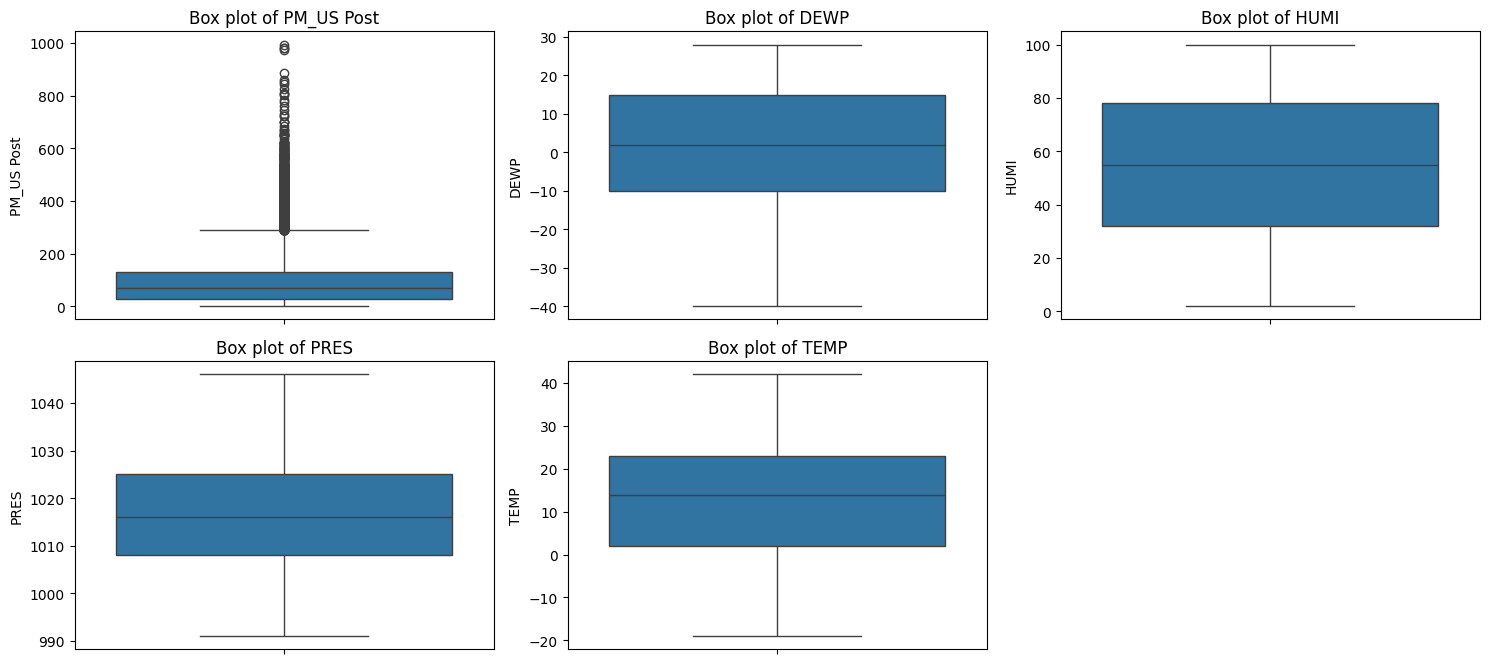

In [ ]:
# Select numerical columns for box plots
numerical_cols = ['PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP']

# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create box plots for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Create subplots in a 3x3 grid
    sns.boxplot(y=df[col]) # Generate box plot for the current column
    plt.title(f'Box plot of {col}') # Set the title of the box plot

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()

These charts highlight the existence of outliers within the column 'PM_US Post'. This column illustrates paticle matter contents recorded by the station. As such outliers will not be handles as extreme values are crucial to understanding severe pollution implications. As such, a more suitable classification model that demonstrates less sensitivity to outliers will be selected such as RandomForestClassifer

## Prepare data




Split the data into training and testing sets using `train_test_split` from the imported library. Identify the non-numeric value 'cv' in the data, which needs to be handled before training the model. This is likely in the 'cbwd' column. Convert the categorical combined Wind column to numerical using encoding. Display the shape of the training and test sets for both the X and Y. Split the data into an 80/20 ratio and select a random state to maintain reproducability by controlling the algorithms randomness.



In [ ]:
# Define features (X) and target (y)
X = df.drop('season', axis=1)
y = df['season']

# Perform one-hot encoding on the 'cbwd' column to convert categorical data to numerical
X = pd.get_dummies(X, columns=['cbwd'], drop_first=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42067, 11)
Shape of X_test: (10517, 11)
Shape of y_train: (42067,)
Shape of y_test: (10517,)


## Train model

The last step is initalizing the maching learning model and training the model using the training data.

In [ ]:
# Initialize and train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate model



Finally, Evaluate the performance of the trained model by making predictions on the test set. Using evaluation metrics such as accuracy, recall, precision, and f1-scores we will be able to determine the overall inital results.



In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.859560711229438
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.79      0.81      2624
           2       0.92      0.93      0.92      2706
           3       0.82      0.78      0.80      2597
           4       0.87      0.93      0.90      2590

    accuracy                           0.86     10517
   macro avg       0.86      0.86      0.86     10517
weighted avg       0.86      0.86      0.86     10517



## Summary of steps and findings :



* All missing values were detected and handles by forward and backward filling
* Data types were convereted to numerical values for the training models suitability
* Outliers were detected and as a result random forest classifier model was selected for its reduced senstivity.
* The data was successfully split into training and testing sets with an 80/20 ratio.
* The features for the model include various meterological attributes, and the target variable is 'season'.
* The 'cbwd' categorical feature was successfully encoded to a numerical format for model training.
* A RandomForestClassifier model was successfully trained on the preprocessed training data.
* The trained model achieved an overall accuracy of approximately 0.86 (86%) on the testing data.
* The classification report provides detailed metrics (precision, recall, f1-score) for each season class, indicating varying performance across different seasons.